**Order Report**

Qiqi Luo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')


In [2]:
df=pd.read_csv('order_info_utf(1).csv')
df.tail()

,order_id,user_id,amount,paytime,day
461800,539420,11211,657.0,2016/5/1,1
461801,539421,11211,472.0,2016/4/30,30
461802,539422,101208,767.0,2016/5/1,1
461803,539423,11211,1036.0,2016/5/1,1
461804,539425,11211,801.0,2016/4/30,30


- user_id: Unique ID for clients (客户编号)
- order_id：Unique ID for orders (订单编号)
- amount：money for each order (订单金额)
- paytime：year/month/day for each order payment (订单年月日)
- day：the day of the month (订单当月第几日)
                                  the data just includes period from March to April
                                  so we analyze on daily basis and take March, April to compare 
                                 

In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461805 entries, 0 to 461804
Data columns (total 5 columns):
order_id    461805 non-null int64
user_id     461805 non-null int64
amount      461805 non-null float64
paytime     461805 non-null object
day         461805 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 17.6+ MB


In [3]:
df.paytime=pd.to_datetime(df['paytime'],infer_datetime_format=True)

In [257]:
 # 之前没有成功parse paytime，因为它不符合'%Y%m%d'的形式（月份和日子需要两位数），后来用Infer能解析
    #导致后面筛选MAR APR时互相混杂，且用的数据错误

## 1. Overall Trend Analysis (by day)
- the total amount for each day
- the total number of orders for each day
- the total users for each day 
                    Take March and April for example

In [4]:
df_Apr=df.loc[(df.paytime<= pd.to_datetime('2016/4/30',infer_datetime_format=True))&(df.paytime> pd.to_datetime('2016/3/31',infer_datetime_format=True))]  
#do not use 'and', 时间要和时间形式比较

In [5]:
df_Mar=df[df.paytime<=pd.to_datetime('2016/3/30',infer_datetime_format=True)]

In [80]:
users_Apr=len(df_Apr.user_id.unique())

In [81]:
users_Mar=len(df_Mar.user_id.unique())

In [77]:
#pd.Series(df_Apr.paytime.unique()).sort_values() check

In [9]:
# user pivot_table to calculation revenue , the numb of orders received each day
pivot_table_Mar=df_Mar.pivot_table(index='day',values=['amount','order_id'], aggfunc={'amount': 'sum', 'order_id': 'count'})

In [10]:
pivot_table_Apr=df_Apr.pivot_table(index='day',values=['amount','order_id'], aggfunc={'amount': 'sum', 'order_id': 'count'})

In [11]:
pivot_table=pivot_table_Mar.merge(pivot_table_Apr, on='day',how='inner')

In [12]:
pivot_table.columns=['amount_Mar','order_Mar','amount_Apr','order_Apr']

In [15]:
#pivot_table.head() # check 

In [47]:
pivot_table.describe()

,amount_Mar,order_Mar,amount_Apr,order_Apr
count,3.000000e+01,30.000000,3.000000e+01,30.000000
mean,5.115096e+06,7683.866667,5.321071e+06,7444.133333
std,9.054195e+05,1254.565723,1.100861e+06,1435.517490
min,3.204660e+06,5079.000000,3.171722e+06,4650.000000
25%,4.562295e+06,6822.000000,4.187996e+06,5887.750000
50%,5.278374e+06,7986.500000,5.985380e+06,7883.500000
75%,5.872973e+06,8610.000000,6.241674e+06,8559.500000
max,6.416124e+06,9485.000000,6.421398e+06,9462.000000


**we could find:**
on avg, there are more daily revenue in Apr than Mar. (larger std in Apr there might be outliers)
but more daily orders made in Mar.
the day with maximum revenue almost doubled than the day with least revenue for both month.


In [48]:
df_Mar.describe()

,order_id,user_id,amount,day
count,230516.000000,230516.000000,230516.000000,230516.000000
mean,135160.198442,22824.740226,665.692913,15.953795
std,78278.191806,22431.838296,284.576717,8.650880
min,1.000000,1.000000,0.000000,1.000000
25%,66528.500000,11211.000000,473.000000,9.000000
50%,135544.500000,11211.000000,630.000000,16.000000
75%,202898.250000,24169.250000,821.000000,23.000000
max,270512.000000,90256.000000,5927.000000,30.000000


## **We could find:**
- The avg amount per order is 665 in March. The avg is slightly beyond the median so we could tell the amount distribution might not be too skwed. That meant the consumption level is smoothly increasing. And there are extreme values like 0 (might be due to promotion) and 5927.
- There were 7683 (230516/30) orders on average per day in March.

In [49]:
df_Apr.describe()

,order_id,user_id,amount,day
count,223324.000000,223324.000000,223324.000000,223324.000000
mean,409378.055207,21651.584062,714.800547,15.273432
std,74614.416023,23707.226218,281.008428,8.341253
min,244701.000000,3.000000,-19.000000,1.000000
25%,345064.750000,11211.000000,530.000000,8.000000
50%,409315.500000,11211.000000,677.000000,15.000000
75%,473656.500000,11211.000000,865.000000,22.000000
max,539425.000000,101535.000000,5254.000000,30.000000


## **We could find:**
- both avg and median amount per order are higher than those of March, as well as all quartiles 
 (Seems people tend to buy more expesive stuff or do we adjust our prices?)
- there were 7444 (223324/30) orders on avg per day in April, almost less 239 orders each day compared to March. 

In [13]:
pivot_table['cumamount_Mar']=pivot_table.amount_Mar.cumsum()

In [14]:
pivot_table['cumamount_Apr']=pivot_table.amount_Apr.cumsum()

In [15]:
concat_table_Mar=pivot_table[['amount_Mar','order_Mar','cumamount_Mar']]
concat_table_Mar.rename(columns={'amount_Mar':'amount','order_Mar':'order', 'cumamount_Mar':'cumamount'},inplace=True)

C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [16]:
concat_table_Mar['month']='Mar'

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [16]:
concat_table_Mar.head()

,amount,order,cumamount,month
day,,,,
1,4.972144e+06,7829,4.972144e+06,Mar
2,4.820543e+06,7365,9.792687e+06,Mar
3,4.993767e+06,7712,1.478645e+07,Mar
4,3.721655e+06,5848,1.850811e+07,Mar
5,3.204660e+06,5079,2.171277e+07,Mar


In [17]:
concat_table_Apr=pivot_table[['amount_Apr','order_Apr','cumamount_Apr']]
concat_table_Apr.columns=['amount','order','cumamount']
concat_table_Apr['month']='Apr'

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
concat_table_Apr.head()

,amount,order,cumamount,month
day,,,,
1,5.265360e+06,7869,5.265360e+06,Apr
2,3.740459e+06,5690,9.005819e+06,Apr
3,3.665345e+06,5501,1.267116e+07,Apr
4,3.745920e+06,5569,1.641708e+07,Apr
5,6.135683e+06,9096,2.255277e+07,Apr


In [18]:
concat_table=pd.concat([concat_table_Apr,concat_table_Mar])

In [19]:
concat_table=concat_table.reset_index()

In [26]:
concat_table.head()

,day,amount,order,cumamount,month
0,1,5.265360e+06,7869,5.265360e+06,Apr
1,2,3.740459e+06,5690,9.005819e+06,Apr
2,3,3.665345e+06,5501,1.267116e+07,Apr
3,4,3.745920e+06,5569,1.641708e+07,Apr
4,5,6.135683e+06,9096,2.255277e+07,Apr


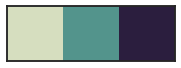

In [137]:
sns.palplot(sns.cubehelix_palette(3, start=.5, rot=-.75))

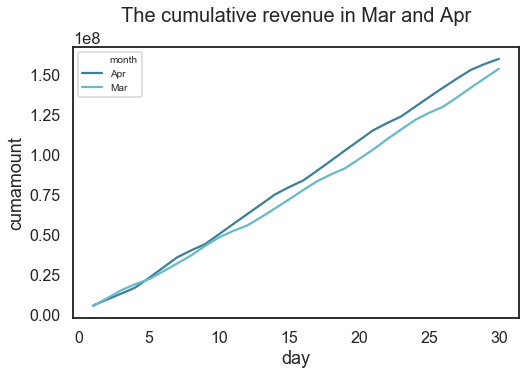

In [31]:
plt.figure(figsize=(8, 5))
sns.set(style="white", context="talk")
#http://seaborn.pydata.org/tutorial/color_palettes.html check palette

#sns.lineplot(x='day', y='cumamount', data=concat_table, hue='month',palette=sns.cubehelix_palette(2, start=.5, rot=-.75))
ax=sns.lineplot(x='day', y='cumamount', data=concat_table, hue='month',palette="GnBu_d")

plt.title('The cumulative revenue in Mar and Apr', fontsize=20, pad=25)


# 设置坐标轴刻度的字体大小
# matplotlib.axes.Axes.tick_params
ax.tick_params(labelsize=16) # axis='y',y轴,不写，默认都改

plt.legend(fontsize=10);#这样就可以设置字体大小
# 将x轴刻度放置在top位置的几种方法
# ax.xaxis.set_ticks_position('top')
#ax.xaxis.tick_top()

# 旋转轴刻度上文字方向的两种方法
#ax.set_xticklabels(ax.get_xticklabels(), rotation=-90)

#保存图片，这样不会出现保存不全
#f.savefig('sns_style_update.jpg', dpi=100, bbox_inches='tight')

In [22]:
#改为周几来画
#pivot_table[['amount_Mar','amount_Apr']].plot(figsize=(10,4))

**we could find:**
- people do not prefer a particular day to order based on Mar and Apr data but it's likely the fluctuation is linked to weekday or weekend
- and we could see the cumulative amount of Mar and Apr are pretty close. if there is price adjustion, we encourage to continue cause Apr is slightly better than Mar, and higher price per order might be more profitable

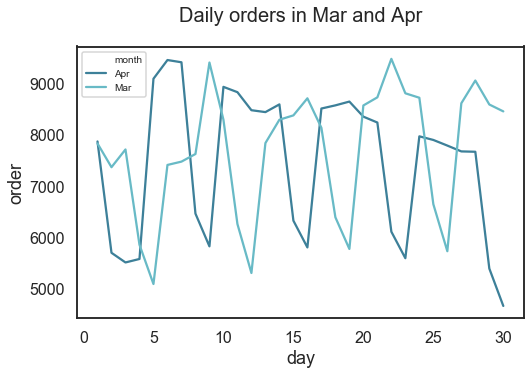

In [32]:
#would approach from weekday or weekend perspective later
plt.figure(figsize=(8, 5))
sns.set(style="white", context="talk")
#http://seaborn.pydata.org/tutorial/color_palettes.html check palette

#sns.lineplot(x='day', y='cumamount', data=concat_table, hue='month',palette=sns.cubehelix_palette(2, start=.5, rot=-.75))
ax=sns.lineplot(x='day', y='order', data=concat_table, hue='month',palette="GnBu_d")

plt.title('Daily orders in Mar and Apr', fontsize=20, pad=25)
plt.legend(loc='upper left')

# 设置坐标轴刻度的字体大小
# matplotlib.axes.Axes.tick_params
ax.tick_params(labelsize=16) # axis='y',y轴,不写，默认都改
plt.legend(fontsize=10)

**we could find:**
- the trend of number of orders for Mar and Apr are similar to the trend of amount (= numb of order * amount per order). That makes sense.
- the price per order is higher in Apr but the numb of orders declines, overall, the total revenue is slightly higher than Mar


In [20]:
# to calculate the numb of users for each day(user may come 3/2,and 3/4, then both count) 
#we just need to drop duplicates for each day
pivot_table['users_Mar']=df_Mar.groupby('day').user_id.apply(lambda x: len(x.unique()))

In [21]:
pivot_table['cum_users_Mar']=df_Mar.groupby('day').user_id.apply(lambda x: len(x.unique())).cumsum()

In [22]:
pivot_table['users_Apr']=df_Apr.groupby('day').user_id.apply(lambda x: len(x.unique()))

In [23]:
pivot_table['cum_users_Apr']=df_Apr.groupby('day').user_id.apply(lambda x: len(x.unique())).cumsum()

In [46]:
#pivot_table.head()

In [24]:
concat_table['daily_user']=pd.concat([pivot_table['users_Apr'],pivot_table['users_Mar']],ignore_index=True)

In [25]:
concat_table['cum_user']=pd.concat([pivot_table['cum_users_Apr'],pivot_table['cum_users_Mar']],ignore_index=True)

In [44]:
#concat_table.head(40)

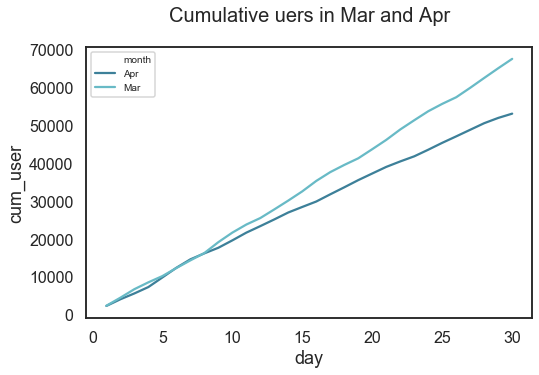

In [61]:
#would approach from weekday or weekend perspective later
plt.figure(figsize=(8, 5))
sns.set(style="white", context="talk")


#sns.lineplot(x='day', y='cumamount', data=concat_table, hue='month',palette=sns.cubehelix_palette(2, start=.5, rot=-.75))
ax=sns.lineplot(x='day', y='cum_user', data=concat_table, hue='month',palette="GnBu_d")

plt.title('Cumulative uers in Mar and Apr', fontsize=20, pad=25)
plt.legend(loc='upper left')

# 设置坐标轴刻度的字体大小
# matplotlib.axes.Axes.tick_params
ax.tick_params(labelsize=16) # axis='y',y轴,不写，默认都改
plt.legend(fontsize=10)

** there are nearly less 15000 users in Apr than in Mar**

In [26]:
concat_table.head()

,day,amount,order,cumamount,month,daily_user,cum_user
0,1,5.265360e+06,7869,5.265360e+06,Apr,2273,2273
1,2,3.740459e+06,5690,9.005819e+06,Apr,1763,4036
2,3,3.665345e+06,5501,1.267116e+07,Apr,1538,5574
3,4,3.745920e+06,5569,1.641708e+07,Apr,1684,7258
4,5,6.135683e+06,9096,2.255277e+07,Apr,2528,9786


In [27]:
concat_table['amount_per_user']=concat_table.amount/concat_table.daily_user

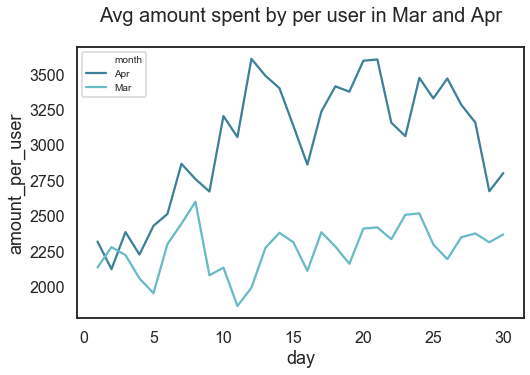

In [28]:
#would approach from weekday or weekend perspective later
plt.figure(figsize=(8, 5))
sns.set(style="white", context="talk")


#sns.lineplot(x='day', y='cumamount', data=concat_table, hue='month',palette=sns.cubehelix_palette(2, start=.5, rot=-.75))
ax=sns.lineplot(x='day', y='amount_per_user', data=concat_table, hue='month',palette="GnBu_d")

plt.title('Avg amount spent by per user in Mar and Apr', fontsize=20, pad=25)
plt.legend(loc='upper left')

# 设置坐标轴刻度的字体大小
# matplotlib.axes.Axes.tick_params
ax.tick_params(labelsize=16) # axis='y',y轴,不写，默认都改
plt.legend(fontsize=10)

In [131]:
concat_table['amount_per_order']=concat_table.amount/concat_table.order

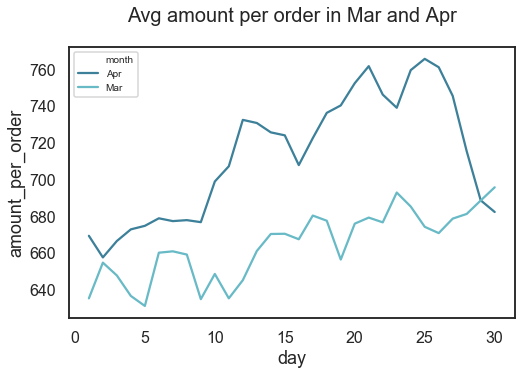

In [133]:
#would approach from weekday or weekend perspective later
plt.figure(figsize=(8, 5))
sns.set(style="white", context="talk")


#sns.lineplot(x='day', y='cumamount', data=concat_table, hue='month',palette=sns.cubehelix_palette(2, start=.5, rot=-.75))
ax=sns.lineplot(x='day', y='amount_per_order', data=concat_table, hue='month',palette="GnBu_d")

plt.title('Avg amount per order in Mar and Apr', fontsize=20, pad=25)
plt.legend(loc='upper left')

# 设置坐标轴刻度的字体大小
# matplotlib.axes.Axes.tick_params
ax.tick_params(labelsize=16) # axis='y',y轴,不写，默认都改
plt.legend(fontsize=10)


In [82]:
df_Apr[df_Apr.user_id==11211].amount.sum()/df_Apr[df_Apr.user_id==11211].amount.count()

741.8528149753354

In [83]:
df_Mar[df_Mar.user_id==11211].amount.sum()/df_Apr[df_Apr.user_id==11211].amount.count()

661.601217486865

**we could find:**
- the amount/user, and the amount/order of April are much higher than those of March. this is consistent with descriptive analysis
- confirmed the_king_user who contributed over 70% amount in total had an avg amount/order which was not too high. thus the high amount/order is not due to this user.
- is there a strategy to exclude low_value and unloyal users and encourage loyal users to buy more expensive stuff? users **made orders more frequently, or buy more expensive stuff** in April? 
- both happened, from the amount/order line plot and the 2nd conclusion, they're definitely buying more expensive stuff. and from order/day graph, there are slightly less orders made in Apr, but users declined more, and from descriptive stats below, orders/user in Apr is higher than in Mar.
- and we could see from above, orders each day doesn't change much.
- combined with last graphs, seems the strategy began on 8th April

## 2. Individual User Behavior Analysis
- **descriptive statistics of the amount of money spent and the numb of orders paid by each user**

  (actually, the stats is highly impacted by some individual users, and it raised the demand to divide users into different groups at first)    (the avg is too high than median, and std is also too high)

- **scatter plot of the amount of money spent and the numb of orders paid**
- **the histogram of the amount of money spent by each user**

  (both scatter and hist showed there are crazy high_value users. To group users better, we want a hist whose bars look continual and shows proper numb of bars, and at the same time, keep enough users. it's the criteria to find a threshold to group users.)

- **the histogram of the numb of orders made by each user**
- **does 20% of users contribute 80% revenue?**
- (the cumulative amount percent help us exclude extreme high value user)

In [116]:
# user pivot table to see the amount, and the numb of orders made by each user
pivot_user_Mar=df_Mar.pivot_table(index='user_id',values=['amount','order_id'],aggfunc={'amount':'sum','order_id':'count'})
pivot_user_Mar['month']='Mar'

In [117]:
pivot_user_Apr=df_Apr.pivot_table(index='user_id',values=['amount','order_id'],aggfunc={'amount':'sum','order_id':'count'})
pivot_user_Apr['month']='Apr'

In [8]:
pivot_user=pivot_user_Mar.merge(pivot_user_Apr, how='outer',on='user_id')
pivot_user.columns=['amount_Mar','orders_made_Mar','Month_Mar','amount_Apr','orders_made_Apr','Month_Apr']

In [104]:
##check if the table is correct

In [105]:
# 1. descriptive statistics of the amount of money spent and the numb of orders paid by
pd.set_option('display.max_columns', None) #强制显示所有列，这是对df的

pivot_user.describe() #为了把三四月份散点图画在一张图上，所以加了两列

,amount_Mar,orders_made_Mar,amount_Apr,orders_made_Apr
count,5.339400e+04,53394.000000,4.396700e+04,43967.000000
mean,2.873972e+03,4.317264,3.630726e+03,5.079355
std,4.637592e+05,655.043769,5.730541e+05,772.462876
min,1.800000e+01,1.000000,-2.000000e+00,1.000000
25%,4.560000e+02,1.000000,4.970000e+02,1.000000
50%,6.510000e+02,1.000000,6.700000e+02,1.000000
75%,9.950975e+02,2.000000,9.870000e+02,1.000000
max,1.071615e+08,151362.000000,1.201601e+08,161973.000000


## **we could find:**
- users in Mar spent 2873, users in Apr spent 3630 on avg, but the medians are 651, 670 in Mar and Apr, the data has extremely high value 
- 4.3 orders made by Mar_user_group, and 5.1 made by Apr_user_group on avg, the max is too high also
- need to exclude high_value users.
- 75% users spent less than 1000 （3/4 spent less than 1000，but the mean is above 3000）
- there were over 530,000 orders, and one or two users made over 310,000 orders.

**note**
- i did not pay attention to the extremely high mean, max, as well as std.
- later when i plot hist and scatter, extreme values destroy the graphs.
- and to make plots, i tried both Chebyshev's Inequality and box method to exclude high values
- Chebyshev's Inequality 5 std just excludes one user, and box excludes slightly over 10,000 users and hist makes sense, however, to split the 10,000 users, i need to use box a lot of times
- so i realize the best way is to always look at your data first, use hist, box, worm better. and the best way is to see the 20/80 curve which is the last question. when you get top value user list, easier to group users.


In [37]:
def plot_func(x_col,y_col,df,hue,title):
    #would approach from weekday or weekend perspective later
    plt.figure(figsize=(8, 5))
    sns.set(style="white", context="talk")

    #sns.lineplot(x='day', y='cumamount', data=concat_table, hue='month',palette=sns.cubehelix_palette(2, start=.5, rot=-.75))
    ax=sns.lineplot(x=x_col, y=y_col, data=df, hue=hue,palette="GnBu_d")
    plt.legend(loc='upper left')
    # 设置坐标轴刻度的字体大小
    # matplotlib.axes.Axes.tick_params
    ax.tick_params(labelsize=16) # axis='y',y轴,不写，默认都改
    plt.legend(fontsize=10)
    plt.title(title, fontsize=20, pad=25)
    plt.show()

In [9]:
#does 20% of users contribute 80% revenue?
concat_Mar_Apr=pd.concat([pivot_user_Mar,pivot_user_Apr])

concat_sort=concat_Mar_Apr.sort_values('amount',ascending=False)

concat_sort.head(50) 

concat_sort['amount_percent']=concat_sort.amount.cumsum()/concat_sort.amount.sum()

concat_sort=concat_sort.reset_index()

top_users=concat_sort[concat_sort['amount_percent']<=0.80000].user_id.unique() # int has no attribute drop_duplicates

len(top_users)/len(concat_sort.user_id.unique())

0.08490343017895557

No handles with labels found to put in legend.
No handles with labels found to put in legend.


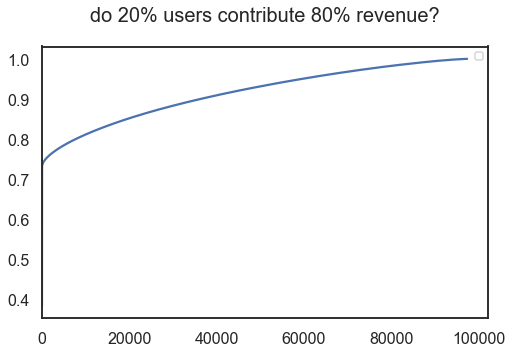

In [11]:
plt.figure(figsize=(8,5))
sns.set(style="white", context="talk")
ax=sns.lineplot(data=concat_sort['amount_percent'])
    # 设置坐标轴刻度的字体大小
    # matplotlib.axes.Axes.tick_params
ax.tick_params(labelsize=16) # axis='y',y轴,不写，默认都改
plt.xlim(left=0)
plt.legend(fontsize=10)
plt.title('do 20% users contribute 80% revenue?', fontsize=20, pad=25)
plt.show()

In [65]:
concat_sort.head(50) 

,user_id,amount,order_id,month,amount_percent
0,11211,1.201601e+08,161973,Apr,0.383794
1,11211,1.071615e+08,151362,Mar,0.726070
2,57282,2.338080e+05,371,Mar,0.726817
3,57282,2.191870e+05,335,Apr,0.727517
4,68226,1.624153e+05,242,Mar,0.728036
5,62590,1.344430e+05,200,Apr,0.728465
6,14427,1.152400e+05,126,Mar,0.728833
7,53616,1.072430e+05,180,Mar,0.729176
8,14427,1.023990e+05,110,Apr,0.729503
9,14271,9.679000e+04,147,Mar,0.729812


**we could find:**
- actually 8.5% users contribute to 80% amount
- user 11211 made up over 70% amount (from the list)

In [278]:
the_king_user_id = [11211]


# over 100,000, the rest is continual
extreme_high_value_user_Mar_list =  [57282,68226 ,14427]

extreme_high_value_user_Apr_list =  [57282,62590 ,14427]





In [279]:
rest_Apr=pd.DataFrame()
set_all_Apr=set(pivot_user_Apr.index)
set_extreme_high_Apr=set(extreme_high_value_user_Apr_list)
list_other11=list(set_all_Apr - set_extreme_high_Apr - set(the_king_user_id))
rest_Apr=pivot_user_Apr.loc[list_other11]


In [92]:
#rest_Apr[rest_Apr['amount']<15000].boxplot('amount')

In [280]:

extreme_high_value_user_Apr_list=extreme_high_value_user_Apr_list+ list(rest_Apr[rest_Apr['amount']>15000].index)

In [281]:
rest_Apr2=pd.DataFrame()
list_other22=list(set_all_Apr - set(extreme_high_value_user_Apr_list)-set(the_king_user_id))
rest_Apr2= pivot_user_Apr.loc[list_other22]

In [282]:

high_value_user_Apr_list= list(rest_Apr2[rest_Apr2['amount']>2000].index)
normal_user_Apr_list= list(set_all_Apr-set(extreme_high_value_user_Apr_list)-set(the_king_user_id)-set(high_value_user_Apr_list))

In [49]:
#先要把它转成df才能装df
extreme_high_value_user_Apr=pd.DataFrame()
high_value_user_Apr=pd.DataFrame()
normal_user_Apr=pd.DataFrame()
extreme_high_value_user_Apr=pivot_user_Apr.loc[extreme_high_value_user_Apr_list]
high_value_user_Apr=pivot_user_Apr.loc[high_value_user_Apr_list]
normal_user_Apr=pivot_user_Apr.loc[normal_user_Apr_list]


In [50]:
rest_Mar = pd.DataFrame()
set_all_Mar = set(pivot_user_Mar.index)
set_extreme_high_Mar = set(extreme_high_value_user_Mar_list)
list_other= list(set_all_Mar - set_extreme_high_Mar-set(the_king_user_id))
#手动排除极大值后剩下的客户，但后面的hist还是太偏，还得继续排，直到avg和median相差不多，即再把下一部分高价值用户区分开
#发现2000是一个好的分界点
rest_Mar= pivot_user_Mar.loc[list_other]


In [98]:
#rest_Mar.boxplot('amount')

In [51]:
# add user_id who spent more than 20,000 into extreme_high_value_user_Mar_list
extreme_high_value_user_Mar_list=extreme_high_value_user_Mar_list+ list(rest_Mar[rest_Mar['amount']>15000].index)

In [52]:
rest_Mar2=pd.DataFrame()
list_other1=list(set_all_Mar - set(extreme_high_value_user_Mar_list)-set(the_king_user_id))
rest_Mar2= pivot_user_Mar.loc[list_other1]

In [295]:
#rest_Mar2.boxplot('amount')

In [232]:
#rest_Mar2.describe()

In [53]:

high_value_user_Mar_list= list(rest_Mar2[rest_Mar2['amount']>2000].index)
normal_user_Mar_list= list(set_all_Mar-set(extreme_high_value_user_Mar_list)-set(the_king_user_id)-set(high_value_user_Mar_list))

In [54]:
#先要把它转成df才能装df
extreme_high_value_user_Mar=pd.DataFrame()
high_value_user_Mar=pd.DataFrame()
normal_user_Mar=pd.DataFrame()
extreme_high_value_user_Mar=pivot_user_Mar.loc[extreme_high_value_user_Mar_list]
high_value_user_Mar=pivot_user_Mar.loc[high_value_user_Mar_list]
normal_user_Mar=pivot_user_Mar.loc[normal_user_Mar_list]

In [55]:
# 52 users,Mar, extreme
#amount: mean= 58192, std=40851, min=15628, q1=29626,q2=46747,q3=77072,max=233808
#order:        89.9        68         13        36        78      145        371  
#extreme_high_value_user_Mar.describe()

In [276]:
# 2492 users, Mar, high
#amount: mean= 3206, std=1760, min=2000, q1=2247,q2=2603,q3=3372,max=14691
#order:        4.04      3.03      1         2       3       5         30
#high_value_user_Mar.describe()

In [277]:
#50877 users, Mar, normal
#amount:mean= 724, std=383, min=18, q1=447,q2=634,q3=921,max=2000
#order:       1.31     0.58      1      1      1      2      13
#normal_user_Mar.describe()

In [278]:
# 26 users,Apr, extreme
#amount: mean= 41607, std=48025, min=15219, q1=16616,q2=18861,q3=40359,max=219187
#order:        54.84        74         7        20        24      50        335  
#extreme_high_value_user_Apr.describe()

In [279]:
# 2287 users,Apr, high
#amount: mean= 3237, std=1818, min=2001, q1=2238,q2=2625,q3=3400,max=14850
#order:        3.91     3.08         1        2       3       4        27  
#high_value_user_Apr.describe()

In [240]:
# 41653 users,Apr, normal
#amount: mean= 743, std=368, min=-2, q1=486,q2=652,q3=912,max=2000
#order:        1.22  0.49         1     1       1      1        7  
#normal_user_Apr.describe()

In [75]:
#high_value_user_Mar.head()

,amount,order_id,month
user_id,,,
29,2092.0,2,Mar
40,2100.0,5,Mar
41,2397.0,2,Mar
57,3125.0,1,Mar
59,2686.0,2,Mar


In [76]:
extreme_high_value_user_Mar['type']='super_high'
high_value_user_Mar['type']='high'
normal_user_Mar['type']='normal'
extreme_high_value_user_Apr['type']='super_high'
high_value_user_Apr['type']='high'
normal_user_Apr['type']='normal'


In [102]:
concat_super=pd.concat([extreme_high_value_user_Apr,extreme_high_value_user_Mar],ignore_index=True)
concat_high=pd.concat([high_value_user_Apr,high_value_user_Mar],ignore_index=True)
concat_normal=pd.concat([normal_user_Apr,normal_user_Mar],ignore_index=True)
concat=pd.concat([extreme_high_value_user_Apr,high_value_user_Apr,normal_user_Apr,extreme_high_value_user_Mar,high_value_user_Mar,normal_user_Mar],ignore_index=True)

<Figure size 576x864 with 0 Axes>

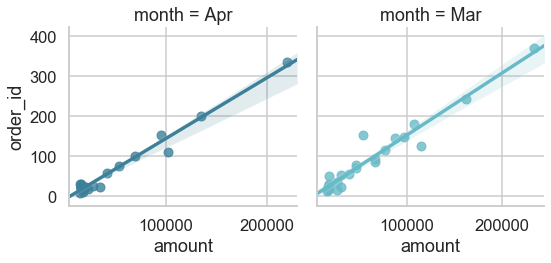

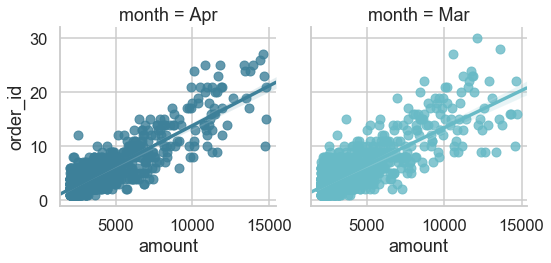

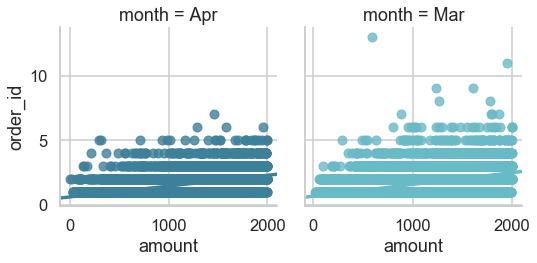

In [120]:
#for slides
plt.figure(figsize=(8,12))
sns.set(style='whitegrid',context='talk')
for data in [concat_super, concat_high, concat_normal]:
    
    sns.lmplot(x='amount',y='order_id',data=data,col='month',sharex=False,sharey=True,height=4,aspect=1,hue='month',palette="GnBu_d")

    plt.show()
    
    

In [83]:
#concat.info()

In [84]:
#users_Mar+users_Apr

In [94]:
#plt.figure(figsize=(10,12))
#sns.set(style="whitegrid", context="talk")
#sns.lmplot(x='amount',y='order_id',data=concat,col='month',row='type',sharex=False,sharey=False,height=4,aspect=1,hue='month',palette="GnBu_d")
#plt.title('relationship between amount and orders of 3 types users')

In [95]:
#plt.figure(num=1,figsize=(10,8))
#plt.subplot(2,3,1)
#sns.joinplot(extreme_high_value_user_Mar['amount'],extreme_high_value_user_Mar['order_id'],kind='reg')
#plt.legend('extreme_high',loc='upper left')
#plt.xticks([50000, 150000,200000])
#plt.xlabel('amount')
#plt.ylabel('numb of orders')
#plt.ylim(top=400)

#plt.subplot(2,3,2)
#plt.scatter(high_value_user_Mar['amount'],high_value_user_Mar['order_id'],label='high')
#plt.xlabel('amount')
#plt.ylabel('numb of orders')
#plt.legend(loc='upper left')
#plt.ylim(top=35)

#plt.subplot(2,3,3)
#plt.scatter(normal_user_Mar['amount'],normal_user_Mar['order_id'],label='normal')
#plt.xlabel('amount')
#plt.ylabel('numb of orders')
#plt.legend(loc='upper left')
#plt.ylim(top=14)

#plt.subplot(2,3,4)
#plt.scatter(extreme_high_value_user_Apr['amount'],extreme_high_value_user_Apr['order_id'],label='extreme_high',c='b')
#plt.legend(loc='upper left')
#plt.xticks([50000, 150000,200000])
#plt.xlabel('amount')
#plt.ylabel('numb of orders')
#plt.ylim(top=400)

#plt.subplot(2,3,5)
#plt.scatter(high_value_user_Apr['amount'],high_value_user_Apr['order_id'],label='high',c='b')
#plt.xlabel('amount')
#plt.ylabel('numb of orders')
#plt.legend(loc='upper left')
#plt.ylim(top=35)

#plt.subplot(2,3,6)
#plt.scatter(normal_user_Apr['amount'],normal_user_Apr['order_id'],label='normal',c='b')
#plt.xlabel('amount')
#plt.ylabel('numb of orders')
#plt.legend(loc='upper left')
#plt.ylim(top=14)

#plt.suptitle('amount_spent vs numb_of_orders_made of 3 types of users ')
#plt.show()

**we could find**
- there are less big users (spent over 15000) in Apr 
  - 52 in Mar, 26 in Apr
  
- the avg amount/order improves for big users in Apr
  - the estimated avg amount/order for Apr is 250,000/350 = 714
                          - for Mar is 200,000/350 = 571
                           
- total revenue from big user: 1428945 in Mar, 1081805 in Apr

- less high value users (spent over 2000) in Apr
  - 2492 in Mar, 2282 in Apr
- total revenue from high value users :7991217 in Mar, 7403430 in Apr

- for normal users, 50877 in Mar, 41653 in Apr
  - the price varies a lot per order
  - normal user made less orders
- total revenue from normal users: 36871170 in Mar, 30986754 in Apr

- if don't take the king user into account, the rev from Mar is 46291332  , from Apr is: 39471989
   - if count,                                153452867 from Mar,     159632117 from Apr

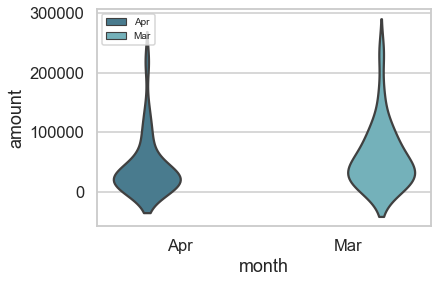

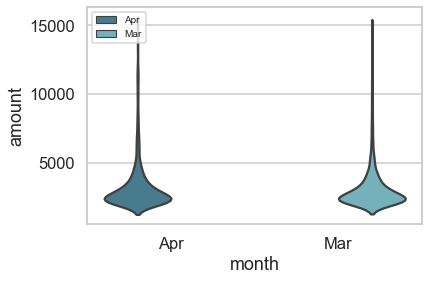

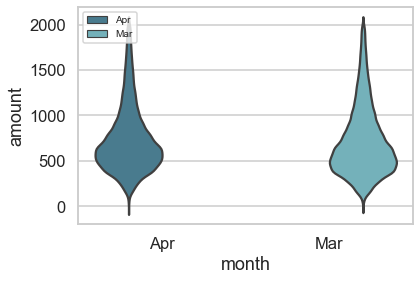

In [121]:
#for slides

sns.set(style='whitegrid',context='talk')
for data2 in [concat_super,concat_high,concat_normal]:
    sns.violinplot(x="month", y="amount", hue="month", data=data2, inner= None, palette="GnBu_d")
    plt.legend(loc='upper left',fontsize=10)
    plt.show()

## 3. User Group Analysis
- When users purchase for the first time and how many
- When users purchase for the 1ast time and how many
- Overall New vs Old
  - how many users just consume for one time (New users)
  - what is the proportion of new users for each day
- User Layer 
  - RFM
  - new, active,return
- the consumption peirod (by order)
  - descriptive statistics of consomption period
  - hist of consomption period
- the consumption peirod (by the last consumption time - the first consumption time)
  - descriptive statistics of consomption period
  - hist of consomption period
  
  

,amount,order_id,month,type
0,893.0,2,Apr,normal
1,1616.0,2,Apr,normal
2,276.0,1,Apr,normal
3,823.0,2,Apr,normal
4,578.0,1,Apr,normal


In [124]:
#group by paytime再对user_id聚合是不行的，因为要每个user的min paytime，需要group by user
#group by 后要取聚合的字段才能显示,groupby 运行时间较长
# the acquisition is important especially for high price/order company, and need to break down by channels

df_Mar_Apr=df[df['paytime']<pd.to_datetime('2016-05-01',format='%Y-%m-%d')]

(array([736024., 736031., 736038., 736045., 736055., 736062., 736069.,
        736076., 736085.]), <a list of 9 Text xticklabel objects>)

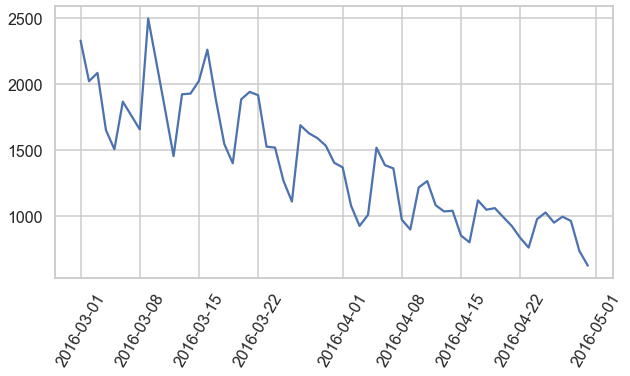

In [135]:
plt.figure(figsize=(10,5))
sns.set(style='whitegrid',context='talk')

ax=sns.lineplot(data=df_Mar_Apr.groupby('user_id').paytime.min().value_counts())

ax.tick_params(labelsize=16)
plt.xticks(rotation=60)

## we could find
- there is obvious down trending of acquisition, combined with analysis above, it might be impacted by higher amount/order in Apr
- and we need to break acquisition down into different channels

(array([736024., 736031., 736038., 736045., 736055., 736062., 736069.,
        736076., 736085.]), <a list of 9 Text xticklabel objects>)

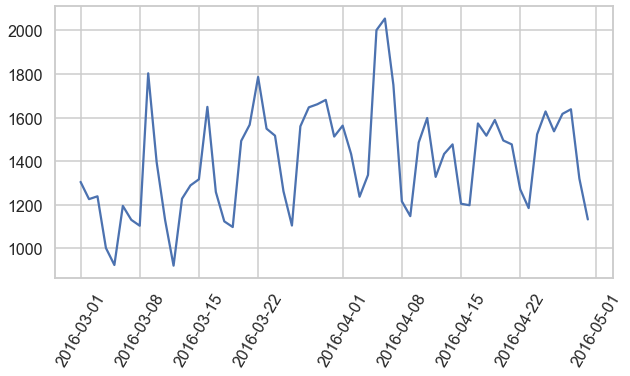

In [136]:
plt.figure(figsize=(10,5))
sns.set(style='whitegrid',context='talk')

ax=sns.lineplot(data=df_Mar_Apr.groupby('user_id').paytime.max().value_counts())

ax.tick_params(labelsize=16)
plt.xticks(rotation=60)


**we could find:**
- there is peak churn rate between 4/5 and 4/6.
- around between 1300 and 1400 users churn per day from March to April.

In [30]:
new_old_Mar=df_Mar.groupby('user_id').paytime.agg(['min','max'])
new_old_Apr=df_Apr.groupby('user_id').paytime.agg(['min','max'])

In [31]:
new_user_Mar= sum(new_old_Mar['min']==new_old_Mar['max'])
new_user_Apr= sum(new_old_Apr['min']==new_old_Apr['max'])

In [32]:
old_user_Mar = sum(new_old_Mar['min']<new_old_Mar['max'])
old_user_Apr = sum(new_old_Apr['min']<new_old_Apr['max'])

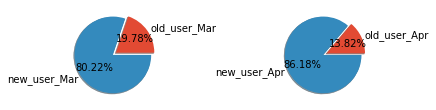

In [47]:
plt.subplot(1,2,1)
plt.pie([old_user_Mar, new_user_Mar],labels=['old_user_Mar','new_user_Mar'],autopct="%0.2f%%",explode=[0.1,0], shadow=True)

plt.subplot(1,2,2)
plt.pie([old_user_Apr, new_user_Apr],labels=['old_user_Apr','new_user_Apr'],autopct="%0.2f%%",explode=[0.1,0], shadow=True)
plt.tight_layout()
plt.show()


## we could find
- the new users make up 72% of total users,and 18% are old users

In [271]:
rfm_Mar=df_Mar.pivot_table(index='user_id',values=['paytime','order_id','amount'],
                           aggfunc={'paytime':'max','order_id':'count','amount':'sum'})
rfm_Apr=df_Apr.pivot_table(index='user_id',values=['paytime','order_id','amount'],
                           aggfunc={'paytime':'max','order_id':'count','amount':'sum'})

In [272]:
rfm_Mar['R']=(pd.to_datetime('2016/5/1')-rfm_Mar['paytime'])/np.timedelta64(1,'D')

rfm_Mar.rename(columns={'order_id':'F','amount':'M'},inplace=True)
rfm_Apr['R']=(pd.to_datetime('2016/5/1')-rfm_Apr['paytime'])/np.timedelta64(1,'D')
rfm_Apr.rename(columns={'order_id':'F','amount':'M'},inplace=True)

In [139]:
#apply 是dataframe的method，但不能对整个df起作用, applymap可以针对cell,但是一个cell没有median
#def rfm_func(x):
    #x[['R','F','M']]
rfm_Mar_original=rfm_Mar.copy()
#不知为什么加上if那个条件就不行了，如果只是x-x.median(),可以判断出bool，另外是三个列都不行，删掉R也不行
#rfm_Mar[['F','M']]=rfm_Mar[['F','M']].apply(lambda x: 1 if x-x.median()>=0 else 0)


In [273]:
rfm_Mar[['R_sign','F_sign','M_sign']]= rfm_Mar[['R','F','M']].apply(lambda x: x-x.median()>=0)
rfm_Apr[['R_sign','F_sign','M_sign']]= rfm_Apr[['R','F','M']].apply(lambda x: x-x.median()>=0)

In [274]:
#rfm_Mar[['R_sign','F_sign','M_sign']].head()
for col in ['R_sign','F_sign','M_sign']:
    rfm_Mar[col]=rfm_Mar[col].map({True: '1', False: '0'})
    

rfm_Mar['label'] = rfm_Mar.R_sign + rfm_Mar.F_sign + rfm_Mar.M_sign

for col in ['R_sign','F_sign','M_sign']:
    rfm_Apr[col]=rfm_Apr[col].map({True: '1', False: '0'})
    

rfm_Apr['label'] = rfm_Apr.R_sign + rfm_Apr.F_sign + rfm_Apr.M_sign

In [275]:
#rfm_Mar.head()
rfm_Mar['label']=rfm_Mar['label'].map({'111':'important_value',
                                       '101':'important_to_develop',
                                       '001':'important_to_detain',
                                       '011':'important_to_keep',
                                       '110':'normal_value',
                                       '100':'normal_to_develop',
                                       '000':'normal_to_detain',
                                       '010':'normal_to_keep'})

rfm_Apr['label']=rfm_Apr['label'].map({'111':'important_value',
                                       '101':'important_to_develop',
                                       '001':'important_to_detain',
                                       '011':'important_to_keep',
                                       '110':'normal_value',
                                       '100':'normal_to_develop',
                                       '000':'normal_to_detain',
                                       '010':'normal_to_keep'})

In [143]:
rfm_Mar.head()

,M,F,paytime,R,R_sign,F_sign,M_sign,label
user_id,,,,,,,,
1,1065.408,4,2016-03-26,36.0,0,1,1,important_to_keep
2,376.000,1,2016-03-10,52.0,1,1,0,normal_value
5,628.000,1,2016-03-21,41.0,0,1,0,normal_to_keep
7,837.000,2,2016-03-07,55.0,1,1,1,important_value
9,504.000,2,2016-03-09,53.0,1,1,0,normal_value


In [144]:
rfm_list_Mar=rfm_Mar.label.value_counts()

In [145]:
rfm_Apr.head()

,M,F,paytime,R,R_sign,F_sign,M_sign,label
user_id,,,,,,,,
3,893.0,2,2016-04-04,27.0,1,1,1,important_value
5,1616.0,2,2016-04-12,19.0,1,1,1,important_value
6,276.0,1,2016-04-28,3.0,0,1,0,normal_to_keep
8,823.0,2,2016-04-26,5.0,0,1,1,important_to_keep
10,578.0,1,2016-04-06,25.0,1,1,0,normal_value


In [276]:
rfm_list_Apr=rfm_Apr.label.value_counts()

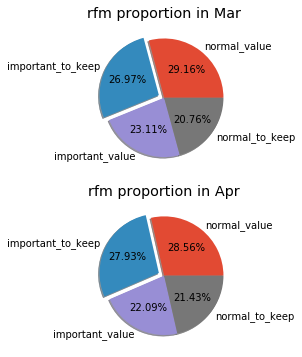

In [75]:
plt.figure(num=1,figsize=(6,6))
plt.subplot(2,1,1)
plt.pie(rfm_list_Mar,labels=['normal_value','important_to_keep','important_value','normal_to_keep'],autopct="%0.2f%%",explode=[0,0.1,0,0], shadow=True)
plt.title('rfm proportion in Mar')

plt.subplot(2,1,2)
plt.pie(rfm_list_Apr,labels=['normal_value','important_to_keep','important_value','normal_to_keep'],autopct="%0.2f%%",explode=[0,0.1,0,0], shadow=True)
plt.title('rfm proportion in Apr')

plt.show()

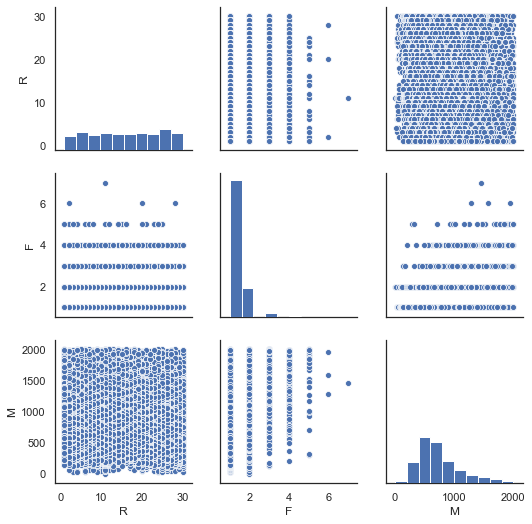

In [284]:
sns.set(style='white')
sns.pairplot(rfm_Apr.loc[normal_user_Apr_list,['R','F','M']], diag_kind='hist')

plt.show()

In [37]:
# users life cycle: new, active, churn, return
df_Mar.head()

,order_id,user_id,amount,paytime,day
0,1,11211,833.0,2016-03-01,1
1,2,11211,487.0,2016-03-01,1
2,4,74553,737.0,2016-03-01,1
3,5,37799,647.0,2016-03-01,1
4,6,11211,1200.0,2016-03-01,1


In [45]:
df_Mar_life_cycle=df_Mar.pivot_table(index='user_id',columns='paytime',values='order_id',aggfunc='count').fillna(0)

In [75]:
df_Apr_life_cycle=df_Apr.pivot_table(index='user_id',columns='paytime',values='order_id',aggfunc='count').fillna(0)

In [46]:
df_Mar_life_cycle=df_Mar_life_cycle.T

In [76]:
df_Apr_life_cycle=df_Apr_life_cycle.T

In [47]:
df_Mar_life_cycle=df_Mar_life_cycle.applymap(lambda x: '1' if x>0 else '0')

In [77]:
df_Apr_life_cycle=df_Apr_life_cycle.applymap(lambda x: '1' if x>0 else '0')

In [78]:
df_Apr_life_cycle.head()

user_id,3,5,6,8,10,14,15,17,18,21,...,101523,101524,101525,101527,101528,101529,101531,101532,101533,101535
paytime,,,,,,,,,,,,,,,,,,,,,
2016-04-01,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2016-04-02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-04-03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-04-04,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-04-05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
df_Mar_life_cycle.head()

user_id,1,2,5,7,9,10,12,13,14,19,...,90202,90208,90209,90210,90211,90212,90213,90214,90251,90256
paytime,,,,,,,,,,,,,,,,,,,,,
2016-03-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-03-02,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-03-03,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2016-03-04,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-03-05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [234]:
#type(df_Mar_life_cycle.iloc[0,1])

In [49]:
df_Mar_life_cycle_sign=df_Mar_life_cycle+df_Mar_life_cycle.shift()

In [79]:
df_Apr_life_cycle_sign=df_Apr_life_cycle+df_Apr_life_cycle.shift()

In [50]:
df_Mar_life_cycle_sign.head()

user_id,1,2,5,7,9,10,12,13,14,19,...,90202,90208,90209,90210,90211,90212,90213,90214,90251,90256
paytime,,,,,,,,,,,,,,,,,,,,,
2016-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-03-02,10,00,00,00,00,00,00,00,00,00,...,00,00,00,00,00,00,00,00,00,00
2016-03-03,01,00,00,00,00,00,00,00,10,00,...,00,00,00,00,00,00,00,00,00,00
2016-03-04,00,00,00,00,00,00,00,00,01,00,...,00,00,00,00,00,00,00,00,00,00
2016-03-05,00,00,00,00,00,00,00,00,00,00,...,00,00,00,00,00,00,00,00,00,00


In [51]:
df_Mar_life_cycle_sign.iloc[0,:]=df_Mar_life_cycle.iloc[0,:]

In [80]:
df_Apr_life_cycle_sign.iloc[0,:]=df_Apr_life_cycle.iloc[0,:]

In [81]:
df_Apr_life_cycle_sign.head()

user_id,3,5,6,8,10,14,15,17,18,21,...,101523,101524,101525,101527,101528,101529,101531,101532,101533,101535
paytime,,,,,,,,,,,,,,,,,,,,,
2016-04-01,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2016-04-02,00,00,00,00,00,00,00,00,00,01,...,00,00,00,00,00,00,00,00,00,00
2016-04-03,00,00,00,00,00,00,00,00,00,00,...,00,00,00,00,00,00,00,00,00,00
2016-04-04,10,00,00,00,00,00,00,00,00,00,...,00,00,00,00,00,00,00,00,00,00
2016-04-05,01,00,00,00,00,00,00,00,00,00,...,00,00,00,00,00,00,00,00,00,00


In [52]:
df_Mar_life_cycle_sign.head()

user_id,1,2,5,7,9,10,12,13,14,19,...,90202,90208,90209,90210,90211,90212,90213,90214,90251,90256
paytime,,,,,,,,,,,,,,,,,,,,,
2016-03-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-03-02,10,00,00,00,00,00,00,00,00,00,...,00,00,00,00,00,00,00,00,00,00
2016-03-03,01,00,00,00,00,00,00,00,10,00,...,00,00,00,00,00,00,00,00,00,00
2016-03-04,00,00,00,00,00,00,00,00,01,00,...,00,00,00,00,00,00,00,00,00,00
2016-03-05,00,00,00,00,00,00,00,00,00,00,...,00,00,00,00,00,00,00,00,00,00


In [239]:
#df_Mar_life_cycle_sign.iloc[0,:]=df_Mar_life_cycle_sign.iloc[0,:].map({'0':'unreg','1':'new'})

In [240]:
#df_Mar_life_cycle_sign.head()

In [53]:
def life_cycle_func (df):
    status=[]
    for i in range(30):
        if df[i] == '0':
            status.append('unreg')
        if df[i]=='11':
            status.append('active')
        if df[i]=='01':
            status.append('churn')
        if df[i]=='00':
            if len(set(status))==1:
                status.append('unreg')
            else:
                status.append('inactive')
        if df[i]=='10':
            if len(set(status))==1:
                status.append('new')
            else:
                status.append('return')                    
        if df[i]=='1':
            status.append('new')
    return status      

In [54]:
#the func took several minutes
df_Mar_life_cycle_sign=df_Mar_life_cycle_sign.apply(life_cycle_func)

In [82]:
df_Apr_life_cycle_sign=df_Apr_life_cycle_sign.apply(life_cycle_func)

In [55]:
df_Mar_life_cycle_sign.head(20)

user_id,1,2,5,7,9,10,12,13,14,19,...,90202,90208,90209,90210,90211,90212,90213,90214,90251,90256
paytime,,,,,,,,,,,,,,,,,,,,,
2016-03-01,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,...,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg
2016-03-02,new,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,...,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg
2016-03-03,churn,unreg,unreg,unreg,unreg,unreg,unreg,unreg,new,unreg,...,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg
2016-03-04,inactive,unreg,unreg,unreg,unreg,unreg,unreg,unreg,churn,unreg,...,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg
2016-03-05,inactive,unreg,unreg,unreg,unreg,unreg,unreg,unreg,inactive,unreg,...,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg
2016-03-06,inactive,unreg,unreg,unreg,unreg,unreg,unreg,unreg,inactive,unreg,...,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg
2016-03-07,inactive,unreg,unreg,new,unreg,unreg,unreg,unreg,inactive,unreg,...,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg
2016-03-08,inactive,unreg,unreg,churn,unreg,unreg,unreg,unreg,return,unreg,...,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg
2016-03-09,inactive,unreg,unreg,inactive,new,unreg,unreg,unreg,churn,unreg,...,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg


In [83]:
df_Apr_life_cycle_sign.head(20)

user_id,3,5,6,8,10,14,15,17,18,21,...,101523,101524,101525,101527,101528,101529,101531,101532,101533,101535
paytime,,,,,,,,,,,,,,,,,,,,,
2016-04-01,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,new,...,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg
2016-04-02,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,churn,...,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg
2016-04-03,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,inactive,...,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg
2016-04-04,new,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,inactive,...,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg
2016-04-05,churn,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,inactive,...,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg
2016-04-06,inactive,unreg,unreg,unreg,new,new,unreg,unreg,new,inactive,...,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg
2016-04-07,inactive,unreg,unreg,unreg,churn,churn,unreg,unreg,churn,inactive,...,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg
2016-04-08,inactive,unreg,unreg,unreg,inactive,inactive,unreg,unreg,inactive,inactive,...,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg
2016-04-09,inactive,unreg,unreg,unreg,inactive,inactive,unreg,unreg,inactive,inactive,...,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg


In [56]:
Mar_life_cycle=df_Mar_life_cycle_sign.T

In [84]:
Apr_life_cycle=df_Apr_life_cycle_sign.T

In [57]:
Mar_life_cycle=Mar_life_cycle.replace('unreg',np.NaN)

In [85]:
Apr_life_cycle=Apr_life_cycle.replace('unreg',np.NaN)

In [58]:
Mar_life_cycle=Mar_life_cycle.apply(lambda x: pd.value_counts(x))

In [86]:
Apr_life_cycle=Apr_life_cycle.apply(lambda x: pd.value_counts(x))

In [59]:
Mar_life_cycle.head()

paytime,2016-03-01 00:00:00,2016-03-02 00:00:00,2016-03-03 00:00:00,2016-03-04 00:00:00,2016-03-05 00:00:00,2016-03-06 00:00:00,2016-03-07 00:00:00,2016-03-08 00:00:00,2016-03-09 00:00:00,2016-03-10 00:00:00,...,2016-03-21 00:00:00,2016-03-22 00:00:00,2016-03-23 00:00:00,2016-03-24 00:00:00,2016-03-25 00:00:00,2016-03-26 00:00:00,2016-03-27 00:00:00,2016-03-28 00:00:00,2016-03-29 00:00:00,2016-03-30 00:00:00
active,NaN,94.0,100,91,52,67,93,91,91,123,...,93,82,104,81,64,53,72,103,99,78
churn,NaN,2237.0,2017,2158,1758,1575,2034,1931,1843,2752,...,2313,2372,2646,2355,2312,1897,1678,2388,2501,2481
inactive,NaN,NaN,2174,4125,6200,7766,9175,11024,12669,14268,...,34839,36401,37968,39839,41576,43302,44469,45279,46799,48428
new,2331.0,2023.0,2086,1653,1507,1868,1763,1658,2498,2155,...,1942,1917,1527,1520,1268,1111,1689,1629,1592,1535
return,NaN,NaN,63,66,83,192,166,185,286,244,...,419,751,805,775,618,586,730,868,868,872


In [87]:
Apr_life_cycle.head()

paytime,2016-04-01 00:00:00,2016-04-02 00:00:00,2016-04-03 00:00:00,2016-04-04 00:00:00,2016-04-05 00:00:00,2016-04-06 00:00:00,2016-04-07 00:00:00,2016-04-08 00:00:00,2016-04-09 00:00:00,2016-04-10 00:00:00,...,2016-04-21 00:00:00,2016-04-22 00:00:00,2016-04-23 00:00:00,2016-04-24 00:00:00,2016-04-25 00:00:00,2016-04-26 00:00:00,2016-04-27 00:00:00,2016-04-28 00:00:00,2016-04-29 00:00:00,2016-04-30 00:00:00
active,NaN,71.0,39,41,55,101,88,69,55,74,...,59,61,51,55,74,79,74,73,72,67
churn,NaN,2202.0,1724,1497,1629,2427,2469,2157,1532,1400,...,1690,1681,1392,1293,1669,1738,1635,1670,1665,1320
inactive,NaN,NaN,2174,3840,5235,6747,9030,11372,13399,14681,...,30107,31547,32962,33996,34943,36286,37697,38888,40155,41514
new,2273.0,1692.0,1471,1585,2371,2339,1994,1391,1289,1626,...,1311,1132,1031,1330,1397,1304,1342,1220,912,760
return,NaN,NaN,28,58,102,117,144,127,130,250,...,372,250,266,358,346,326,327,444,403,306


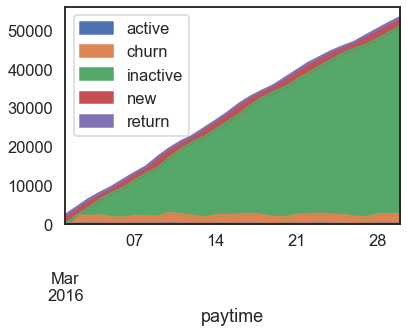

In [60]:
Mar_life_cycle.fillna(0).T.plot.area()

(0.0, 50000)

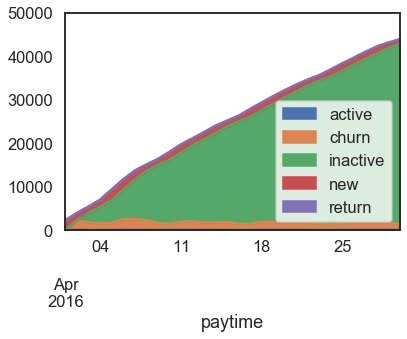

In [89]:
Apr_life_cycle.fillna(0).T.plot.area()
plt.ylim(top=50000)

In [66]:
Mar_life_cycle.fillna(0).head()

,active,churn,inactive,new,return
paytime,,,,,
2016-03-01,0.0,0.0,0.0,2331.0,0.0
2016-03-02,94.0,2237.0,0.0,2023.0,0.0
2016-03-03,100.0,2017.0,2174.0,2086.0,63.0
2016-03-04,91.0,2158.0,4125.0,1653.0,66.0
2016-03-05,52.0,1758.0,6200.0,1507.0,83.0


In [95]:
Apr_life_cycle=Apr_life_cycle.fillna(0).T

In [96]:
Apr_life_cycle.head()

,active,churn,inactive,new,return
paytime,,,,,
2016-04-01,0.0,0.0,0.0,2273.0,0.0
2016-04-02,71.0,2202.0,0.0,1692.0,0.0
2016-04-03,39.0,1724.0,2174.0,1471.0,28.0
2016-04-04,41.0,1497.0,3840.0,1585.0,58.0
2016-04-05,55.0,1629.0,5235.0,2371.0,102.0


In [69]:
Mar_life_cycle_ratio=pd.DataFrame()
Mar_life_cycle_ratio[['active_per','new_per','return_per']] = Mar_life_cycle[['active','new','return']].apply(lambda x: x/x.sum(),axis=1)

In [97]:
Apr_life_cycle_ratio=pd.DataFrame()
Apr_life_cycle_ratio[['active_per','new_per','return_per']] = Apr_life_cycle[['active','new','return']].apply(lambda x: x/x.sum(),axis=1)

In [71]:
Mar_life_cycle_ratio=Mar_life_cycle_ratio.reset_index()

In [98]:
Apr_life_cycle_ratio=Apr_life_cycle_ratio.reset_index()

In [99]:
Apr_life_cycle_ratio=pd.melt(Apr_life_cycle_ratio,id_vars='paytime',value_vars=['active_per','new_per','return_per'],var_name='type',value_name='ratio')
Apr_life_cycle_ratio.head()

,paytime,type,ratio
0,2016-04-01,active_per,0.000000
1,2016-04-02,active_per,0.040272
2,2016-04-03,active_per,0.025358
3,2016-04-04,active_per,0.024347
4,2016-04-05,active_per,0.021756


In [72]:
Mar_life_cycle_ratio=pd.melt(Mar_life_cycle_ratio,id_vars='paytime',value_vars=['active_per','new_per','return_per'],var_name='type',value_name='ratio')
Mar_life_cycle_ratio.head()

,paytime,type,ratio
0,2016-03-01,active_per,0.000000
1,2016-03-02,active_per,0.044402
2,2016-03-03,active_per,0.044464
3,2016-03-04,active_per,0.050276
4,2016-03-05,active_per,0.031669


(736024.0, 736054.45)

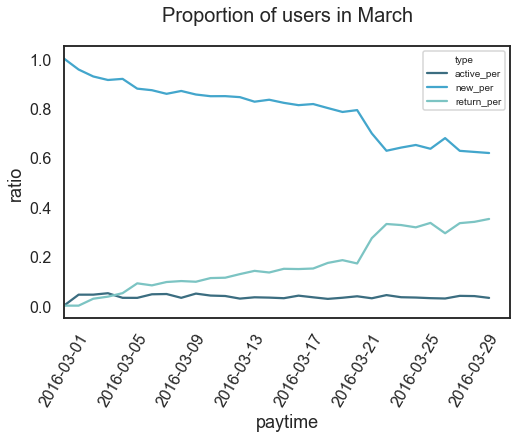

In [74]:
plt.figure(figsize=(8, 5))
sns.set(style="white", context="talk")


#sns.lineplot(x='day', y='cumamount', data=concat_table, hue='month',palette=sns.cubehelix_palette(2, start=.5, rot=-.75))
ax=sns.lineplot(x='paytime', y='ratio', data=Mar_life_cycle_ratio, hue='type',palette="GnBu_d")

plt.title('Proportion of users in March', fontsize=20, pad=25)


# 设置坐标轴刻度的字体大小
# matplotlib.axes.Axes.tick_params
ax.tick_params(labelsize=16) # axis='y',y轴,不写，默认都改
plt.legend(fontsize=10)
plt.xticks(rotation=60)
plt.xlim(left=pd.to_datetime('2016-03-01'))

(736055.0, 736085.45)

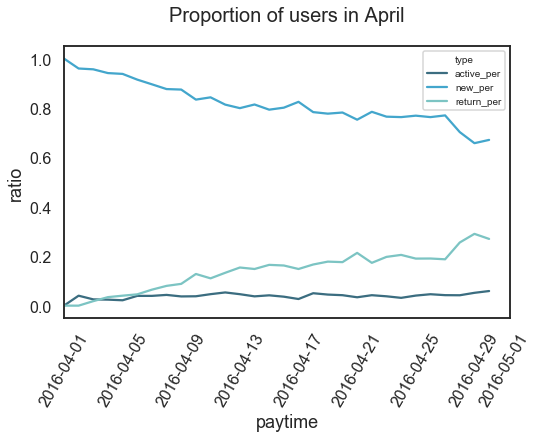

In [100]:
plt.figure(figsize=(8, 5))
sns.set(style="white", context="talk")


#sns.lineplot(x='day', y='cumamount', data=concat_table, hue='month',palette=sns.cubehelix_palette(2, start=.5, rot=-.75))
ax=sns.lineplot(x='paytime', y='ratio', data=Apr_life_cycle_ratio, hue='type',palette="GnBu_d")

plt.title('Proportion of users in April', fontsize=20, pad=25)


# 设置坐标轴刻度的字体大小
# matplotlib.axes.Axes.tick_params
ax.tick_params(labelsize=16) # axis='y',y轴,不写，默认都改
plt.legend(fontsize=10)
plt.xticks(rotation=60)
plt.xlim(left=pd.to_datetime('2016-04-01'))

In [182]:
#宽表可以用
#Mar_life_cycle_ratio['Return_per']=Mar_life_cycle['return']/(Mar_life_cycle['inactive'].shift()+Mar_life_cycle['churn'].shift())

In [181]:
#Mar_life_cycle_ratio['Return_per'].head()

**We could find:**
- from the active, return, inactive ratio, we could judge which operation is efficient and which needs improvement (acquisiion needs improvement, return strategy is efficient, keeping users active is stable)
- we could see how the return ratio fluctuates

In [101]:
# how many days each order took on avg? (for the first order taken a specific user, the day is 0)
order_day_Mar=df_Mar.groupby('user_id').apply(lambda x: x.paytime-x.paytime.shift())

In [102]:
order_day_Apr=df_Apr.groupby('user_id').apply(lambda x: x.paytime-x.paytime.shift())

In [103]:
order_day_Mar.describe()

count                    177122
mean     0 days 16:56:03.214055
std      3 days 01:57:17.815715
min           -1 days +00:00:00
25%             0 days 00:00:00
50%             0 days 00:00:00
75%             0 days 00:00:00
max            29 days 00:00:00
Name: paytime, dtype: object

In [104]:
order_day_Apr.describe()

count                    179357
mean     0 days 08:15:42.888206
std      2 days 02:34:33.191376
min           -2 days +00:00:00
25%             0 days 00:00:00
50%             0 days 00:00:00
75%             0 days 00:00:00
max            29 days 00:00:00
Name: paytime, dtype: object

In [105]:
order_day_Mar=order_day_Mar/np.timedelta64(1,'D')

In [106]:
order_day_Apr=order_day_Apr/np.timedelta64(1,'D')

(0.0, 0.3)

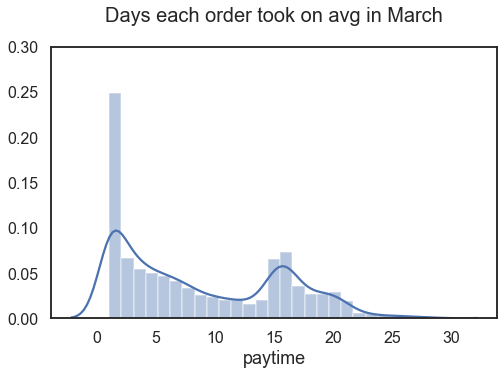

In [110]:
plt.figure(figsize=(8, 5))
sns.set(style="white", context="talk")

#sns.lineplot(x='day', y='cumamount', data=concat_table, hue='month',palette=sns.cubehelix_palette(2, start=.5, rot=-.75))
ax=sns.distplot(order_day_Mar[order_day_Mar>0])

plt.title('Days each order took on avg in March', fontsize=20, pad=25)

# 设置坐标轴刻度的字体大小
# matplotlib.axes.Axes.tick_params
ax.tick_params(labelsize=16)
plt.ylim(top=0.3)

**there were 160000 orders with 0 day, cause most users just come once, and we filter them**

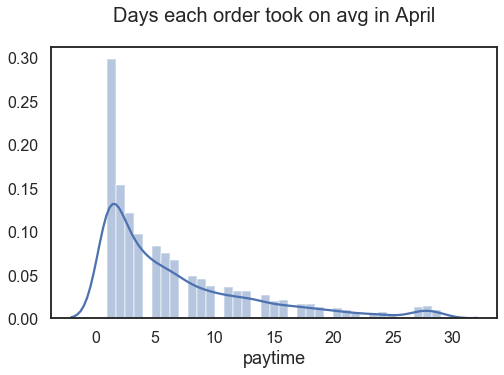

In [109]:
plt.figure(figsize=(8, 5))
sns.set(style="white", context="talk")

#sns.lineplot(x='day', y='cumamount', data=concat_table, hue='month',palette=sns.cubehelix_palette(2, start=.5, rot=-.75))
ax=sns.distplot(order_day_Apr[order_day_Apr>0])

plt.title('Days each order took on avg in April', fontsize=20, pad=25)

# 设置坐标轴刻度的字体大小
# matplotlib.axes.Axes.tick_params
ax.tick_params(labelsize=16)

In [194]:
# how long did users stay on avg?
user_life_Mar = df_Mar.groupby('user_id').paytime.apply(lambda x: x.max()-x.min())

In [111]:
user_life_Apr = df_Apr.groupby('user_id').paytime.apply(lambda x: x.max()-x.min())

In [195]:
user_life_Mar.head()

user_id
1   24 days
2    0 days
5    0 days
7    0 days
9    0 days
Name: paytime, dtype: timedelta64[ns]

In [112]:
user_life_Apr.describe()

count                     43967
mean     1 days 09:42:19.659289
std      4 days 14:38:26.140444
min             0 days 00:00:00
25%             0 days 00:00:00
50%             0 days 00:00:00
75%             0 days 00:00:00
max            29 days 00:00:00
Name: paytime, dtype: object

In [196]:
user_life_Mar.describe()

count                     53394
mean     2 days 08:10:31.082144
std      5 days 16:36:18.272435
min             0 days 00:00:00
25%             0 days 00:00:00
50%             0 days 00:00:00
75%             0 days 00:00:00
max            29 days 00:00:00
Name: paytime, dtype: object

In [197]:
user_life_Mar=(user_life_Mar/np.timedelta64(1,'D'))

In [113]:
user_life_Apr=(user_life_Apr/np.timedelta64(1,'D'))

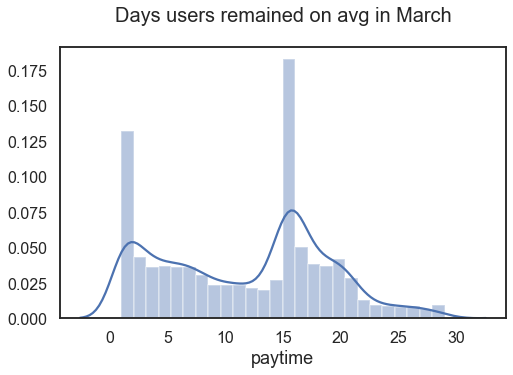

In [200]:
plt.figure(figsize=(8, 5))
sns.set(style="white", context="talk")

#sns.lineplot(x='day', y='cumamount', data=concat_table, hue='month',palette=sns.cubehelix_palette(2, start=.5, rot=-.75))
ax=sns.distplot(user_life_Mar[user_life_Mar>0])

plt.title('Days users remained on avg in March', fontsize=20, pad=25)

# 设置坐标轴刻度的字体大小
# matplotlib.axes.Axes.tick_params
ax.tick_params(labelsize=16)


(0.0, 0.175)

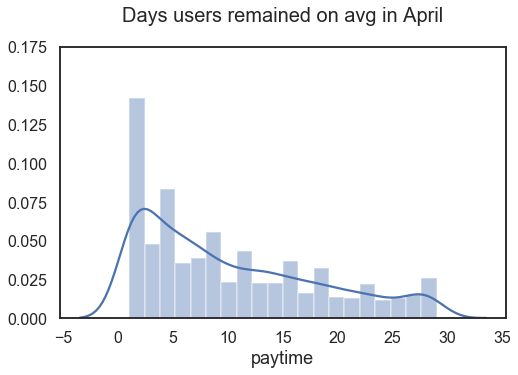

In [115]:
plt.figure(figsize=(8, 5))
sns.set(style="white", context="talk")

#sns.lineplot(x='day', y='cumamount', data=concat_table, hue='month',palette=sns.cubehelix_palette(2, start=.5, rot=-.75))
ax=sns.distplot(user_life_Apr[user_life_Apr>0])

plt.title('Days users remained on avg in April', fontsize=20, pad=25)

# 设置坐标轴刻度的字体大小
# matplotlib.axes.Axes.tick_params
ax.tick_params(labelsize=16)
plt.ylim(top=0.175)

**after filter users who just bought once, the user life has two peaks**

## 4. Repurchase rate  & Buyback rate
- Rr: purchase more than once in one month
- Br: purchase in two consecutive months



In [119]:
#df_Mar.head()

,order_id,user_id,amount,paytime,day
0,1,11211,833.0,2016-03-01,1
1,2,11211,487.0,2016-03-01,1
2,4,74553,737.0,2016-03-01,1
3,5,37799,647.0,2016-03-01,1
4,6,11211,1200.0,2016-03-01,1


C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [135]:
#repurchase_pivot_Mar=df_Mar.pivot_table(index='paytime',columns='user_id',values='order_id',aggfunc='count')

In [163]:
purchase_Mar=df_Mar.groupby('paytime').user_id.apply(lambda x: len(x.unique()))

In [171]:
purchase_Apr=df_Apr.groupby('paytime').user_id.apply(lambda x: len(x.unique()))

In [155]:
repurchase_Mar=df_Mar.groupby(['paytime','user_id']).order_id.count()

In [172]:
repurchase_Apr=df_Apr.groupby(['paytime','user_id']).order_id.count()

In [156]:
repurchase_Mar=repurchase_Mar[repurchase_Mar>1].reset_index()

In [173]:
repurchase_Apr=repurchase_Apr[repurchase_Apr>1].reset_index()

In [158]:
repurchase_Mar=repurchase_Mar.groupby('paytime').user_id.count()

In [174]:
repurchase_Apr=repurchase_Apr.groupby('paytime').user_id.count()

In [165]:
repurchase_ratio_Mar=repurchase_Mar/purchase_Mar

In [175]:
repurchase_ratio_Apr=repurchase_Apr/purchase_Apr

In [169]:
repurchase_ratio_Mar=repurchase_ratio_Mar.reset_index()
repurchase_ratio_Mar['month']='Mar'

In [176]:
repurchase_ratio_Apr=repurchase_ratio_Apr.reset_index()
repurchase_ratio_Apr['month']='Apr'

In [234]:
repurchase_ratio_Apr

,paytime,user_id,month
0,2016-04-01,0.116146,Apr
1,2016-04-02,0.101531,Apr
2,2016-04-03,0.106632,Apr
3,2016-04-04,0.105701,Apr
4,2016-04-05,0.111946,Apr
5,2016-04-06,0.116543,Apr
6,2016-04-07,0.141060,Apr
7,2016-04-08,0.129805,Apr
8,2016-04-09,0.127544,Apr
9,2016-04-10,0.140513,Apr


In [236]:
repurchase_ratio_Mar=repurchase_ratio_Mar.iloc[0:29,:]

In [237]:
repurchase_ratio=pd.concat([repurchase_ratio_Mar,repurchase_ratio_Apr],ignore_index=True)

In [238]:
repurchase_ratio.rename({'user_id':'repurchase_ratio'},inplace=True,axis='columns')

In [239]:
repurchase_ratio['repurchase_ratio'][30]

0.10153148043108338

In [240]:
repurchase_ratio['repurchase_ratio']=pd.to_numeric(repurchase_ratio['repurchase_ratio'])

In [241]:
repurchase_ratio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 3 columns):
paytime             59 non-null object
repurchase_ratio    59 non-null float64
month               59 non-null object
dtypes: float64(1), object(2)
memory usage: 1.5+ KB


(array([736024., 736031., 736038., 736045., 736055., 736062., 736069.,
        736076., 736085.]), <a list of 9 Text xticklabel objects>)

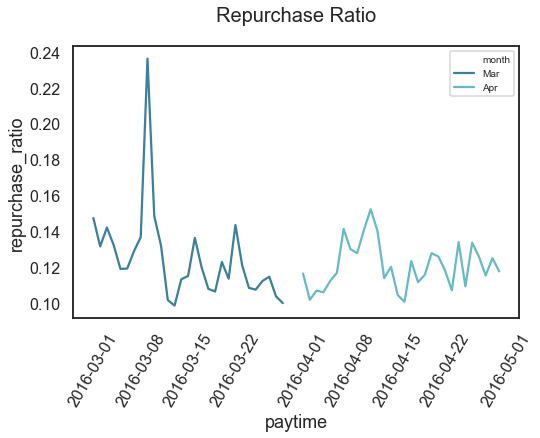

In [242]:
plt.figure(figsize=(8, 5))
sns.set(style="white", context="talk")


#sns.lineplot(x='day', y='cumamount', data=concat_table, hue='month',palette=sns.cubehelix_palette(2, start=.5, rot=-.75))
ax=sns.lineplot(y='repurchase_ratio', x='paytime', data=repurchase_ratio, hue='month',palette="GnBu_d")

plt.title('Repurchase Ratio', fontsize=20, pad=25)


# 设置坐标轴刻度的字体大小
# matplotlib.axes.Axes.tick_params
ax.tick_params(labelsize=16) # axis='y',y轴,不写，默认都改
plt.legend(fontsize=10)
plt.xticks(rotation=60)


In [257]:
df_Mar.tail()

,order_id,user_id,amount,paytime,day,month
230527,270486,11211,640.0,2016-03-30,30,Mar
230528,270487,27222,946.0,2016-03-30,30,Mar
230537,270501,6085,860.0,2016-03-30,30,Mar
230538,270502,90256,730.0,2016-03-30,30,Mar
230545,270512,87359,1378.0,2016-03-30,30,Mar


In [265]:
buy_Mar=set(df_Mar.user_id)

In [266]:
buy_Apr=set(df_Apr.user_id)

In [267]:
buy_back=buy_Mar & buy_Apr

In [268]:
buy_back_ratio=len(buy_back)/len(buy_Mar)

In [269]:
buy_back_ratio

0.2389594336442297

In [136]:
#np.array(df_Mar_life_cycle.iloc[:,1])

In [135]:
#np.array(df_Mar_life_cycle.iloc[:,1].shift()) shift会自己把最后一个数截断

In [138]:
#df_Mar_life_cycle.iloc[:,1]+df_Mar_life_cycle.iloc[:,1].shift() 不用转np array

In [51]:
# exclude amount which exceeds 2*(Q3-Q1), and order_id which exceeds 5 SD
#pivot_user_exclude_extremevalue1=pivot_user[bool1&bool11&bool3&bool33]

#pivot_user_Mar_exclude_extremvalue1=pivot_user_exclude_extremevalue1[['amount_Mar','order_id_Mar','Month_Mar']]
#pivot_user_Mar_exclude_extremvalue1.columns=['amount','order_id','month']

#pivot_user_Apr_exclude_extremvalue1=pivot_user_exclude_extremevalue1[['amount_Apr','order_id_Apr','Month_Apr']]
#pivot_user_Apr_exclude_extremvalue1.columns=['amount','order_id','month']

#concat_exclude_extremevalue1=pd.concat([pivot_user_Mar_exclude_extremvalue1,pivot_user_Apr_exclude_extremvalue1])

#concat_exclude_extremevalue1.loc[concat_exclude_extremevalue1['month']=='Mar','color']='b'

#concat_exclude_extremevalue1.loc[concat_exclude_extremevalue1['month']=='Apr','color']='g'

#再次用箱形图排除得出长尾图，算出2000以上的客户只有2517人(包括前面手动剔除的极大值)
#rest_Mar[rest_Mar['amount']<857+5*1263].amount.hist(bins=50)

#high_value_user_Mar_numb=len(rest_Mar[rest_Mar['amount']>2000].amount)+len(the_king_user_id)+len(extreme_high_value_user_Mar_list)

#high_value_user_Mar_numb

#high_value_user_Mar=rest_Mar[rest_Mar['amount']>2000]

#high_value_user_Mar.describe()

#user_Mar=pivot_user_Mar[pivot_user_Mar['amount']<2000]

#user_Mar.amount.hist(bins=20)

#user_Mar.describe()

#这个是用箱型图排的，和用切比雪夫排的图差距很大
#bool1=pivot_user['amount_Mar']<2*(995-456)

#这个得用切比雪夫排
#bool2=pivot_user['order_id_Mar']<4.31+5*655

#bool3=pivot_user['amount_Mar']<287+5*463759

#bool11=pivot_user['amount_Apr']<2*(982-482)

#bool22=pivot_user['order_id_Apr']<4.94+5*747

#bool33=pivot_user['amount_Apr']<351+5*553109

# there are 53394
#pivot_user_exclude_extremevalue_Mar_c=pivot_user[bool3&bool2] 
#（从amount标准差上十万,与它的均值几千比起来，切比雪夫定律，箱型图 来排除这两个方式的效果值得怀疑）


#users_Mar

#len(pivot_user_exclude_extremevalue_Mar.reset_index().user_id.unique()) 切比雪夫只排掉了一个人

#pivot_user_exclude_extremevalue_Mar_b=pivot_user[bool1&bool2]

#high_value_Mar=pivot_user[~(bool1&bool2)]

#high_value_Mar[high_value_Mar.amount_Mar<high_value_Mar.amount_Mar.max()].describe()

#high_value_Mar[high_value_Mar.amount_Mar<2*(1909-1234)].amount_Mar.hist(bins=20)

#extreme_high_value_Mar=high_value_Mar[(high_value_Mar.amount_Mar>=2*(1909-1234))&(high_value_Mar.amount_Mar<high_value_Mar.amount_Mar.max())]

#extreme_high_value_Mar.describe()

#top_user_Mar= extreme_high_value_Mar[extreme_high_value_Mar.amount_Mar>=2*(2340-1510)]

#top_user_Mar.amount_Mar.describe()

#len(pivot_user_exclude_extremevalue_Mar_b.reset_index().user_id.unique())

#pivot_user_exclude_extremevalue_Mar_b.amount_Mar.hist(bins=30)

# use Chebyshev's Inequality to exclude values exceeding 5 SD (applied to amount & order_id)
#pivot_user_Mar_exclude_extremvalue=pivot_user_exclude_extremevalue[['amount_Mar','order_id_Mar','Month_Mar']]
#pivot_user_Mar_exclude_extremvalue.columns=['amount','order_id','month']

#pivot_user_Apr_exclude_extremvalue=pivot_user_exclude_extremevalue[['amount_Apr','order_id_Apr','Month_Apr']]
#pivot_user_Apr_exclude_extremvalue.columns=['amount','order_id','month']

#concat_exclude_extremevalue=pd.concat([pivot_user_Mar_exclude_extremvalue,pivot_user_Apr_exclude_extremvalue])

#concat_exclude_extremevalue.loc[concat_exclude_extremevalue['month']=='Mar','color']='b'

#concat_exclude_extremevalue.loc[concat_exclude_extremevalue['month']=='Apr','color']='g'

#concat_exclude_extremevalue.plot.scatter(x='amount',y='order_id',c=concat_exclude_extremevalue.color)



#pivot_user_Mar[pivot_user_Mar['amount']<2873].plot.scatter(x='amount',y='order_id')

#pivot_user_Mar.amount.sort_values(ascending=False).head(13348)

#len(pivot_user_Mar[pivot_user_Mar['amount']<2873].amount)

#pivot_user_Mar[pivot_user_Mar['amount']<2873].amount.hist(bins=50)